In [1]:
import os
import cv2

In [2]:
# Directory with our training Fig pictures
train_fig_dir = os.path.join('data/training/Fig Drone Images')

# Directory with our training Non-Fig pictures
train_non_fig_dir = os.path.join('data/training/Non-Fig Images')

### what the filenames look like in the training directories:

In [3]:
train_fig_names = os.listdir(train_fig_dir)
print(train_fig_names[:10])

train_non_fig_names = os.listdir(train_non_fig_dir)

print("\n", train_non_fig_names[:10])

['AA09 (124).JPG', 'AA13.OS (111).JPG', 'AA13.OS (133).JPG', 'AA13.OS (143).JPG', 'AA13.OS (147).JPG', 'AA13.OS (159).JPG', 'AA13.OS (160).JPG', 'AA13.OS (187).JPG', 'B24 OS (113).JPG', 'B24 OS (126).JPG']

 ['AA09 (15).JPG', 'AA09 (22).JPG', 'AA09 (35).JPG', 'AA09 (43).JPG', 'AA09 (54).JPG', 'AA09 (6).JPG', 'AA09 (78).JPG', 'AA09 (80).JPG', 'AA09 (82).JPG', 'AA09 (92).JPG']


### total number of fig and non-fig images in the directories:

In [4]:
print('total training fig images:', len(os.listdir(train_fig_dir)))
print('total training non-fig images:', len(os.listdir(train_non_fig_dir)))

total training fig images: 276
total training non-fig images: 276


### few pictures to get a better sense of what they look like

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

### displaying a batch of 8 Fig and non-fig pictures

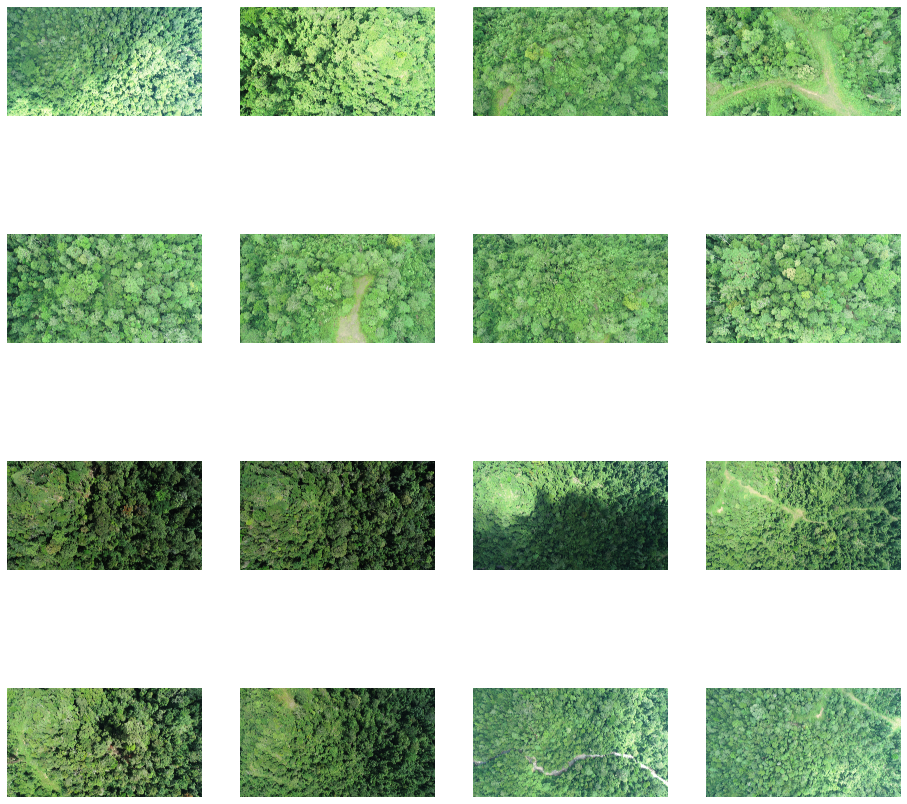

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_fig_pix = [os.path.join(train_fig_dir, fname) 
                for fname in train_fig_names[pic_index-8:pic_index]]
next_non_fig_pix = [os.path.join(train_non_fig_dir, fname) 
                for fname in train_non_fig_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_fig_pix+next_non_fig_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### finding image shape for images using OpenCV 

In [7]:
images_shape = cv2.imread(train_fig_dir + "/"+ train_fig_names[0]).shape
images_shape

(3078, 5472, 3)

### Building a Model with Sigmoid Activation,

    8 convolutional layers, and flatten the final result to feed into the densely connected layers.
    
    for intial model ResourceExhaustedError (Memory)


In [8]:

# import tensorflow as tf

# model = tf.keras.models.Sequential([
    
#     # Note the input shape is the desired size of the image 3078x5472 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(3000, 3000, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The sixth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The seventh convolution
#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The eighth convolution
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),

#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('fig') and 1 for the other ('non-fig')
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    
    # Note the input shape is the desired size of the image 3078x5472 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('fig') and 1 for the other ('non-fig')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model.summary() method call prints a summary of the NN 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

Tvraining our model with the **binary_crossentropy** loss, and using  the **rmsprop** optimizer with a learning rate of 0.001. During training,I want to monitor classification accuracy.

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Data Preprocessing
       Data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. generators will yield batches of images of size 500x500, their labels (binary), and normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.5)

# Flow training images in batches of 64 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'data/training',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 400x400
        batch_size=64,
        shuffle=True,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 552 images belonging to 2 classes.


### Training

    Training for 15 epochs, Loss and Accuracy are a great indication of progress of training.

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 66s 8s/step - loss: 1.2525 - accuracy: 0.5059
Epoch 2/15
8/8 [==============================] - 67s 8s/step - loss: 0.6977 - accuracy: 0.5348
Epoch 3/15
8/8 [==============================] - 68s 8s/step - loss: 0.6949 - accuracy: 0.4816
Epoch 4/15
8/8 [==============================] - 70s 9s/step - loss: 0.6958 - accuracy: 0.5041
Epoch 5/15
8/8 [==============================] - 68s 9s/step - loss: 0.6932 - accuracy: 0.5102
Epoch 6/15
8/8 [==============================] - 68s 9s/step - loss: 0.6944 - accuracy: 0.4959
Epoch 7/15
8/8 [==============================] - 68s 9s/step - loss: 0.6936 - accuracy: 0.4672
Epoch 8/15
8/8 [==============================] - 68s 9s/step - loss: 0.6959 - accuracy: 0.4672
Epoch 9/15
8/8 [==============================] - 67s 8s/step - loss: 0.6958 - accuracy: 0.4713
Epoch 10/15
8/8 [==============================] - 71s 9s/step - loss: 0.6936 - accuracy: 0.4863
Epoch 11/15
8/8 [======================

### Whole-model saving
    can later recreate the same model from this file, even if we no longer have access to the code that created the model.

This file includes:

    The model's architecture, weight values, training config, and optimizer.

In [14]:
model.save('my_model_300_15.h5')

### Visualizing Intermediate Representations

    a random image from the training set, generating a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map.

<ipython-input-15-fa479df26161>:38: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


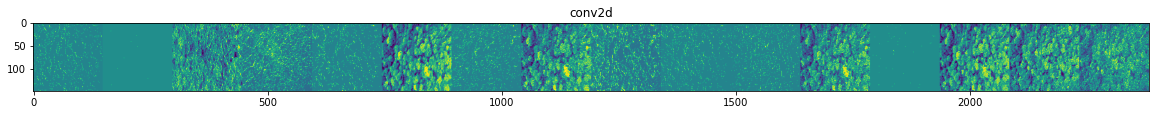

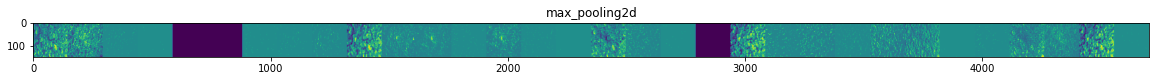

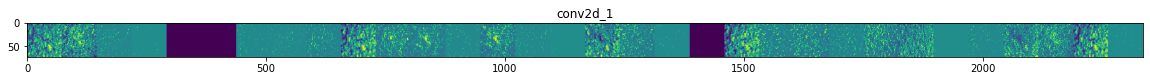

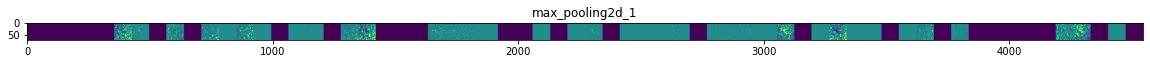

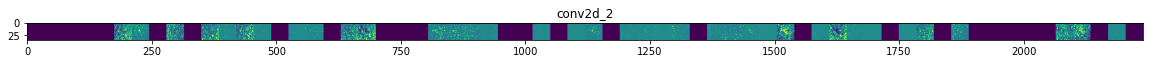

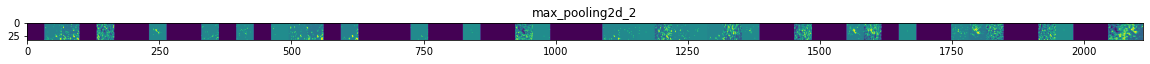

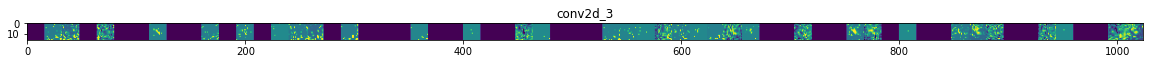

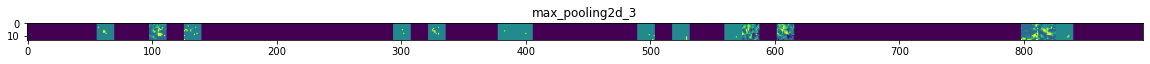

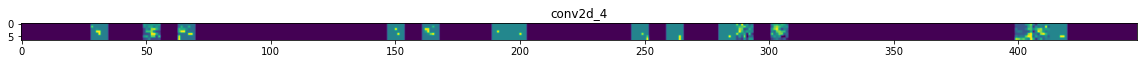

In [15]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# intermediate representations for all layers in the previous model after
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# random input image from the training set.
fig_img_files = [os.path.join(train_fig_dir, f) for f in train_fig_names]
non_fig_img_files = [os.path.join(train_non_fig_dir, f) for f in train_non_fig_names]
img_path = random.choice(fig_img_files + non_fig_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')